In [ ]:
import sys
!{sys.executable} -m pip install --user scikit-allel

In [1]:
import numpy as np
import scipy
import pandas
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_style('ticks')
sns.set_context('notebook')
import h5py
import allel; print('scikit-allel', allel.__version__)

scikit-allel 1.3.8


## VCF to HDF5

In [2]:
#allel.vcf_to_hdf5('/users/mcevoysu/scratch/output/Bpendula/vcf_filtering/Bpendula_SNP_sampleFilt_random_V1.vcf.gz', '/users/mcevoysu/scratch/output/Bpendula/scikit-allel/Bpendula_SNP_sampleFilt_random_V1.h5', fields='*')

## Get data

In [2]:
callset_var_fn = '/users/mcevoysu/scratch/output/Bpendula/scikit-allel/Bpendula_SNP_sampleFilt_random_V1.h5'
callset_var = h5py.File(callset_var_fn, mode='r')

In [3]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [4]:
list(callset_var['variants'])

['AC',
 'AF',
 'ALT',
 'AN',
 'BaseQRankSum',
 'CHROM',
 'DP',
 'END',
 'ExcessHet',
 'FILTER_FILT',
 'FILTER_LowQual',
 'FILTER_PASS',
 'FS',
 'ID',
 'InbreedingCoeff',
 'MLEAC',
 'MLEAF',
 'MQ',
 'MQRankSum',
 'POS',
 'QD',
 'QUAL',
 'RAW_MQandDP',
 'REF',
 'ReadPosRankSum',
 'SOR',
 'altlen',
 'is_snp',
 'numalt']

## Make datasets

In [5]:
variants = allel.VariantChunkedTable(callset_var['variants'])
variants

<VariantChunkedTable shape=(76467,) dtype=[('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_FILT', '?'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')]
   nbytes=13.1M cbytes=3.2M cratio=4.2
   values=h5py._hl.group.Group>

In [6]:
variants_np = variants[:]
rawsnps = variants_np.query('(is_snp == True)')
rawsnps

<VariantTable shape=(76464,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_FILT', '?'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  1,  -1,  -1], [0.001351,      nan,      nan], [b'C', b'', b''], 666,  0.962, b'Contig0', 16693, -1, 0.    , False, False,  True,  0.   , b'.', 0.3746, [  1,  -1,  -1], [0.001351,      nan,      nan], 60., 0.,  36198, 15.16, 3.33470e+02, [-1, -1], b'T',  1.52 , 0.649, [0, 0, 0],  True, 1)
 ([436,  -1,  -1], [0.654   ,      nan,      nan], [b'G', b'', b''], 636, -0.043, b'Contig0', 17345, -1, 1.5801, False, False,  True,  0.   , b'.', 0.0167, [492,  -1,  -1], [0.665   ,      nan,      nan], 60., 0.,  36209, 23.87, 3.72008e+05, [-1, -1], b'A', -0.128, 0.644, [0, 0, 0],  True, 1)
 ([ 12,  -1,  -1], [0.031   ,      nan,      nan], [b'T', b'', b''], 648,  0.66 , b'Contig0', 17175, -1, 1.5489, False, False,  True,  1.013, b'.', 0.0582, [ 21,  -1,  -1], [0.028   ,      nan,      nan], 60., 0.,  36221,  3.82, 2.40602e+03, [-1, -1], b'A',  0.353, 0.871, [0, 0, 0],  True, 1)
 ...
 ([  1,  -1,  -1], [0.002703,      nan,      nan], [b'A', b'', b''], 246,  0.489, b'Contig996',  3159, -1, 0.0063, False, False,  True,  0.   , b'.', 0.2015, [  2,  -1,  -1], [0.002703,      nan,      nan], 60., 0., 209617,  8.44, 1.34970e+02, [-1, -1], b'G',  0.992, 0.223, [0, 0, 0],  True, 1)
 ([ 16,  -1,  -1], [0.036   ,      nan,      nan], [b'G', b'', b''], 522,  0.   , b'Contig999',  5320, -1, 0.    , False, False,  True, 12.35 , b'.', 0.3316, [ 26,  -1,  -1], [0.035   ,      nan,      nan], 60., 0.,   3184, 21.25, 6.75756e+03, [-1, -1], b'A', -1.645, 1.313, [0, 0, 0],  True, 1)
 ([  2,  -1,  -1], [0.004054,      nan,      nan], [b'A', b'', b''], 512, -0.977, b'Contig999',  5342, -1, 0.019 , False, False,  True,  2.477, b'.', 0.3955, [  3,  -1,  -1], [0.004054,      nan,      nan], 60., 0.,   3195,  9.69, 4.94100e+02, [-1, -1], b'G', -0.674, 0.388, [0, 0, 0],  True, 1)]

## Plot function

In [8]:
def plot_hist(f, dsubset='', bins=30, ):
    if dsubset == 'var':
        x = variants[f][:]
        l = 'Variant'
    elif dsubset == 'snp':
        x = rawsnps[f][:]
        l = 'Raw SNP'
    elif dsubset == 'notsnp':
        x = notsnp[f][:]
        l = 'Raw Not SNP'
    elif dsubset == 'biallelic':
        x = biallelic_np[f][:]
        l = 'Biallelic SNP'
    elif dsubset == 'varsel':
        x = var_selection[f][:]
        l = 'Filtered Variants'
    elif dsubset == 'snpsel':
        x = snp_selection[f][:]
        l = 'Filtered SNP'
    else:
        x = bi_selection[f][:]
        l = 'Biallelic SNP'
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.despine(ax=ax, offset=10)
    ax.hist(x, bins=bins)
    ax.set_xlabel(f)
    ax.set_ylabel('No. variants')
    ax.set_title('%s %s distribution' % (l, f))

## Find Biallelic SNPS

In [7]:
numalt = rawsnps['numalt']
np.max(numalt)

3

In [8]:
count_numalt = np.bincount(numalt)
count_numalt

array([     0, 167993,  10219,    264])

In [9]:
n_multiallelic = np.sum(count_numalt[2:])
n_multiallelic

10483

In [10]:
filter_expression = '(numalt == 1)'
biallelic_np = rawsnps.query(filter_expression)[:]
biallelic_np

<VariantTable shape=(167993,) dtype=(numpy.record, [('AC', '<i4', (3,)), ('AF', '<f4', (3,)), ('ALT', 'O', (3,)), ('AN', '<i4'), ('BaseQRankSum', '<f4'), ('CHROM', 'O'), ('DP', '<i4'), ('END', '<i4'), ('ExcessHet', '<f4'), ('FILTER_LowQual', '?'), ('FILTER_PASS', '?'), ('FS', '<f4'), ('ID', 'O'), ('InbreedingCoeff', '<f4'), ('MLEAC', '<i4', (3,)), ('MLEAF', '<f4', (3,)), ('MQ', '<f4'), ('MQRankSum', '<f4'), ('POS', '<i4'), ('QD', '<f4'), ('QUAL', '<f4'), ('RAW_MQandDP', '<i4', (2,)), ('REF', 'O'), ('ReadPosRankSum', '<f4'), ('SOR', '<f4'), ('altlen', '<i4', (3,)), ('is_snp', '?'), ('numalt', '<i4')])>
[([  1,  -1,  -1], [0.001351,      nan,      nan], [b'C', b'', b''], 728,  0.962, b'Contig0', 16693, -1, 0.    , False, False, 0.   , b'.', 0.3746, [  1,  -1,  -1], [0.001351,      nan,      nan], 60. ,  0., 36198, 15.16, 3.33470e+02, [-1, -1], b'T',  1.52 , 0.649, [0, 0, 0],  True, 1)
 ([478,  -1,  -1], [0.654   ,      nan,      nan], [b'G', b'', b''], 728, -0.043, b'Contig0', 17345, -1, 1.5801, False, False, 0.   , b'.', 0.0167, [492,  -1,  -1], [0.665   ,      nan,      nan], 60. ,  0., 36209, 23.87, 3.72008e+05, [-1, -1], b'A', -0.128, 0.644, [0, 0, 0],  True, 1)
 ([ 23,  -1,  -1], [0.031   ,      nan,      nan], [b'T', b'', b''], 728,  0.66 , b'Contig0', 17175, -1, 1.5489, False, False, 1.013, b'.', 0.0582, [ 21,  -1,  -1], [0.028   ,      nan,      nan], 60. ,  0., 36221,  3.82, 2.40602e+03, [-1, -1], b'A',  0.353, 0.871, [0, 0, 0],  True, 1)
 ...
 ([  2,  -1,  -1], [0.002703,      nan,      nan], [b'A', b'', b''], 728,    nan, b'Contig999',    65, -1, 0.    , False, False, 0.   , b'.', 0.3372, [ 16,  -1,  -1], [0.022   ,      nan,      nan], 60. , nan,  3633, 25.42, 1.27950e+02, [-1, -1], b'G',    nan, 2.303, [0, 0, 0],  True, 1)
 ([  4,  -1,  -1], [0.005405,      nan,      nan], [b'G', b'', b''], 728,    nan, b'Contig999',    64, -1, 0.    , False, False, 0.   , b'.', 0.3427, [ 29,  -1,  -1], [0.039   ,      nan,      nan], 60. , nan,  3635, 27.65, 2.54020e+02, [-1, -1], b'A',    nan, 3.258, [0, 0, 0],  True, 1)
 ([  2,  -1,  -1], [0.002703,      nan,      nan], [b'T', b'', b''], 728,    nan, b'Contig999',    63, -1, 0.    , False, False, 0.   , b'.', 0.3405, [ 17,  -1,  -1], [0.023   ,      nan,      nan], 40.5, nan,  3636, 29.48, 1.38640e+02, [-1, -1], b'C',    nan, 2.303, [0, 0, 0],  True, 1)]

## MQ - RMS mapping quality

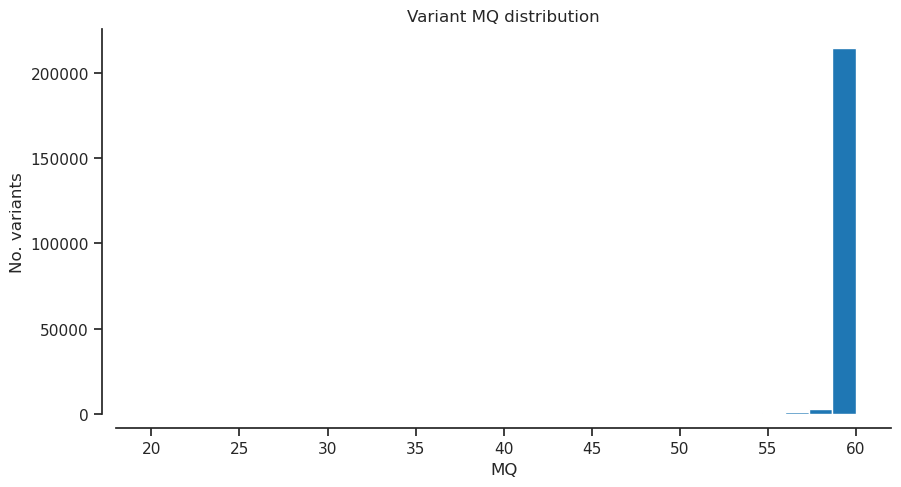

In [14]:
plot_hist('MQ','var') # RMS mapping quality

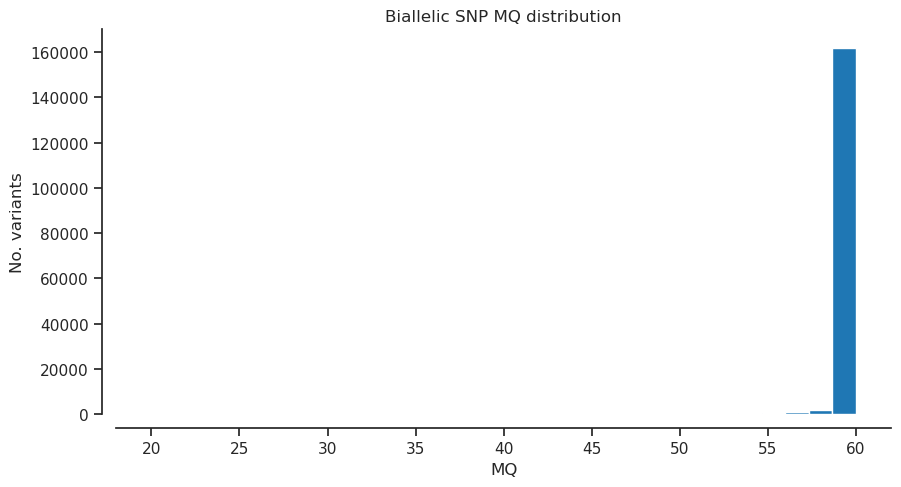

In [15]:
plot_hist('MQ','biallelic') # RMS mapping quality

In [16]:
filter_expression = '(MQ < 55)'
bi_selection = biallelic_np.query(filter_expression)[:]
#np.count_nonzero(var_selection)

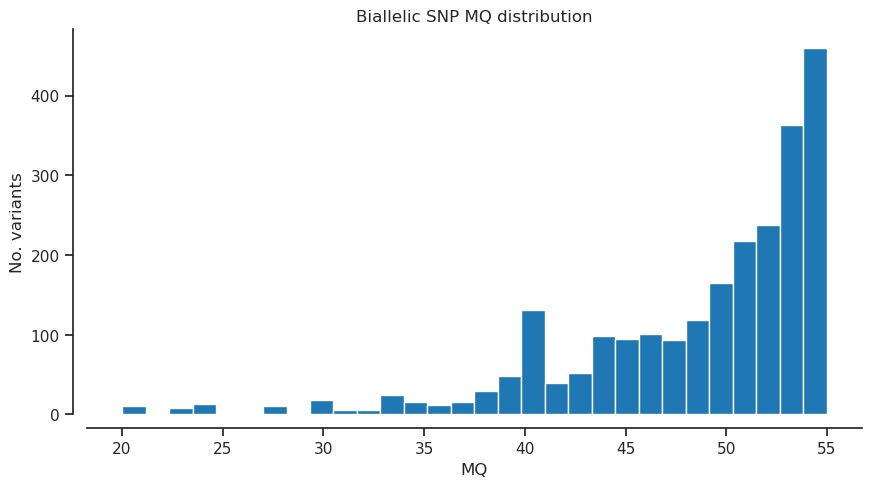

In [17]:
plot_hist('MQ')

In [18]:
filter_expression = '(MQ < 40)'
bi_selection = biallelic_np.query(filter_expression)[:]

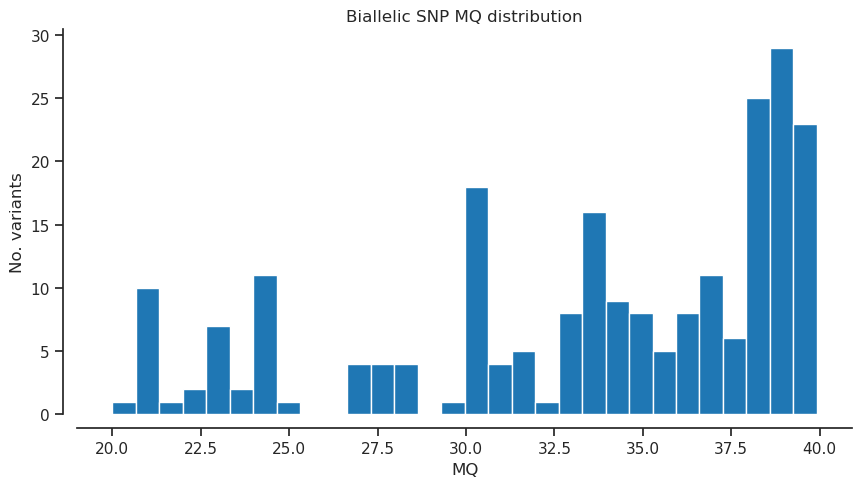

In [19]:
plot_hist('MQ')

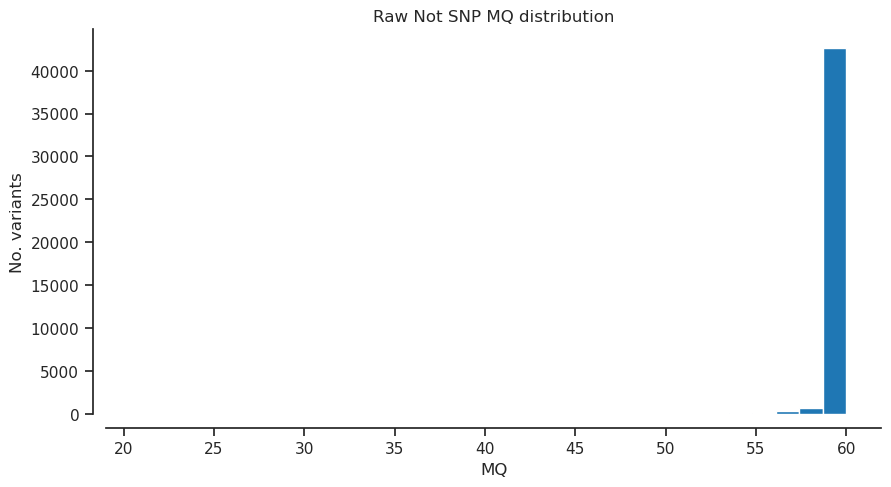

In [20]:
plot_hist('MQ','notsnp')

## QD - Variant Confidence/Quality by Depth

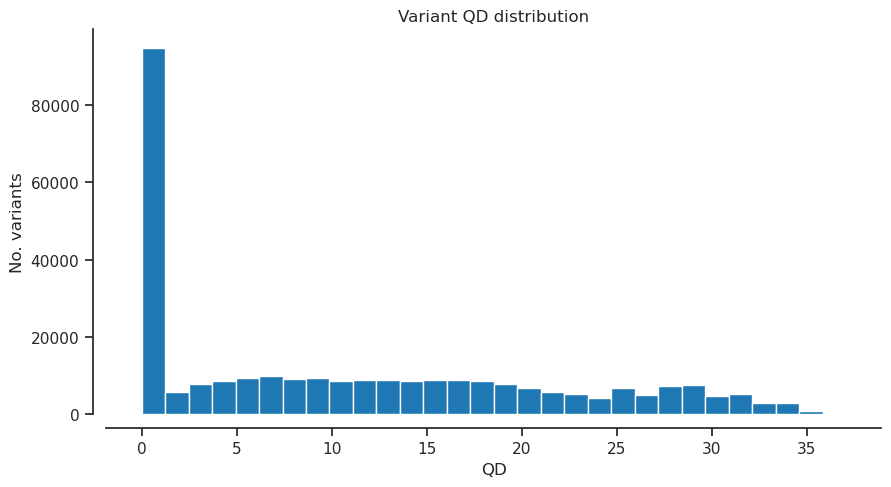

In [21]:
plot_hist('QD','var') # Variant Confidence/Quality by Depth

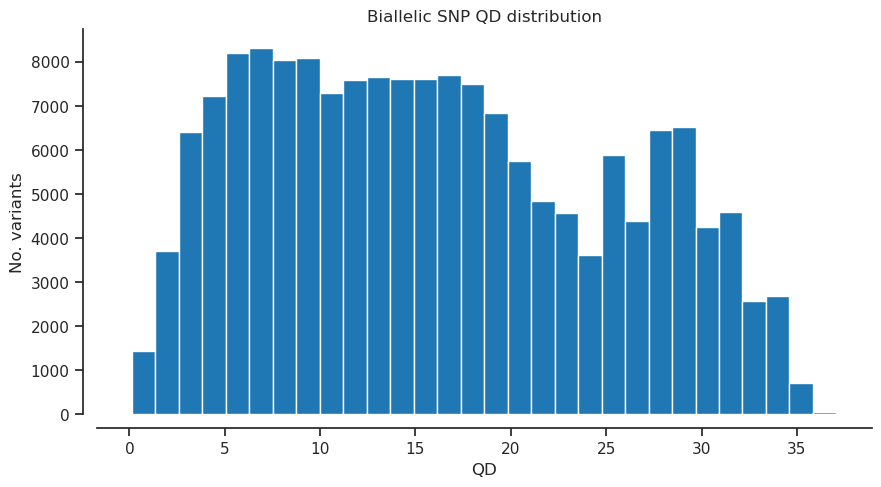

In [22]:
plot_hist('QD','biallelic') # Variant Confidence/Quality by Depth

In [23]:
filter_expression = '(QD < 2)'
bi_selection = biallelic_np.query(filter_expression)[:]

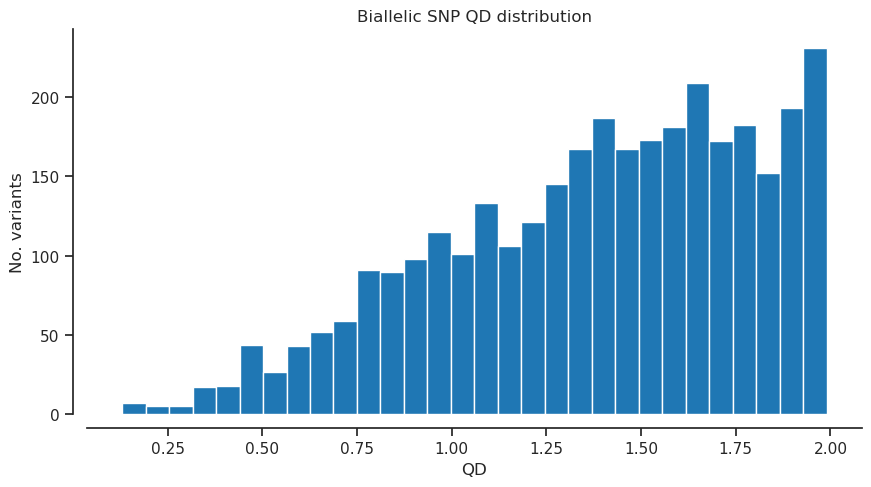

In [24]:
plot_hist('QD')

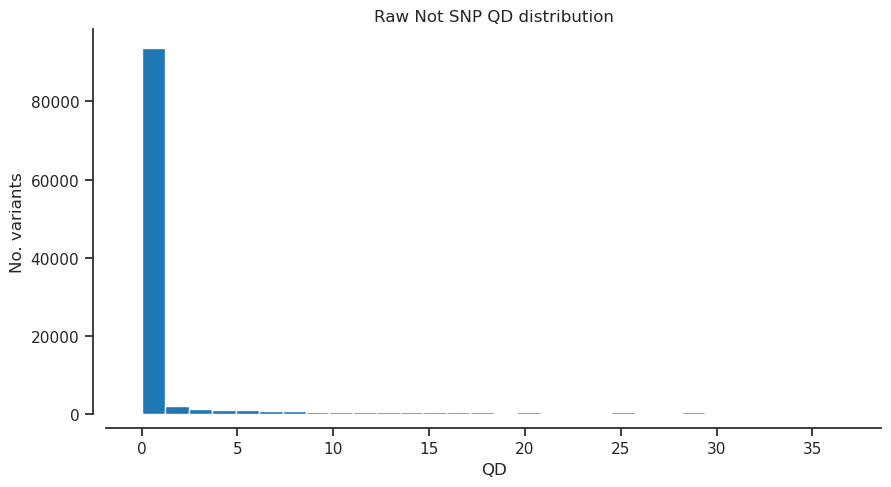

In [25]:
plot_hist('QD','notsnp') # Variant Confidence/Quality by Depth

## SOR - Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

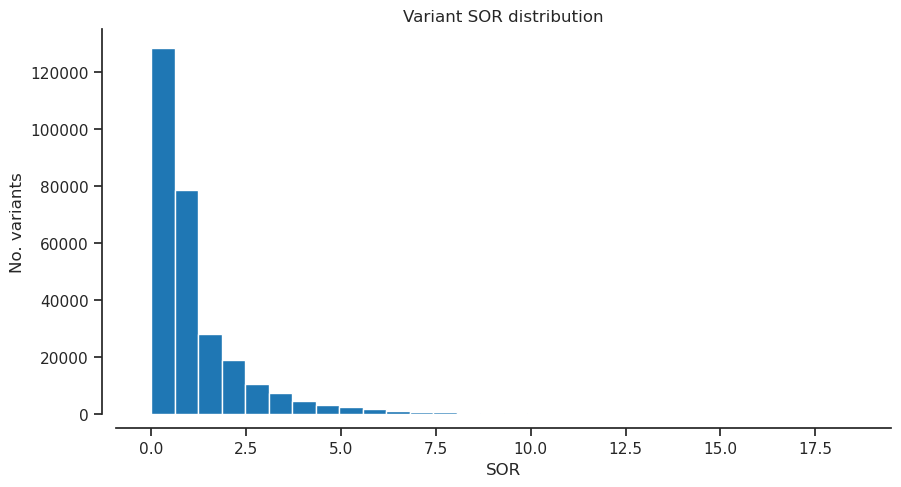

In [26]:
plot_hist('SOR', 'var') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

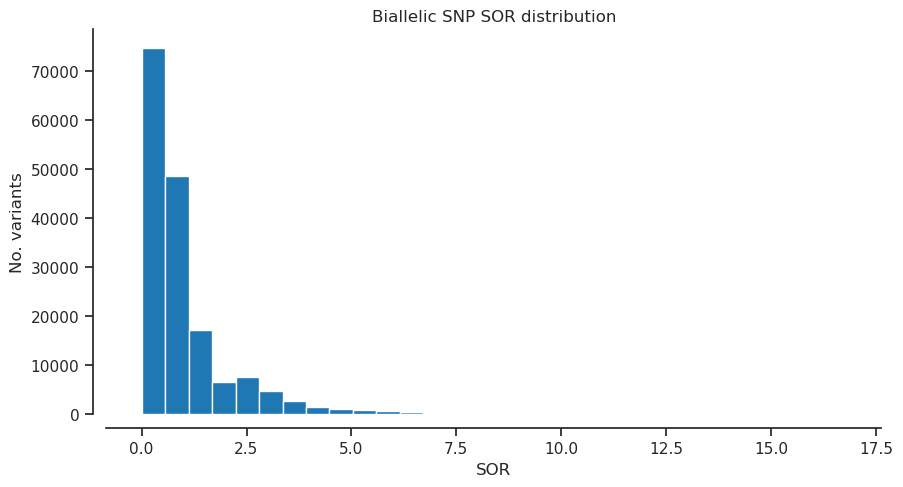

In [27]:
plot_hist('SOR','biallelic') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

In [28]:
filter_expression = '(SOR > 3)'
bi_selection = biallelic_np.query(filter_expression)[:]

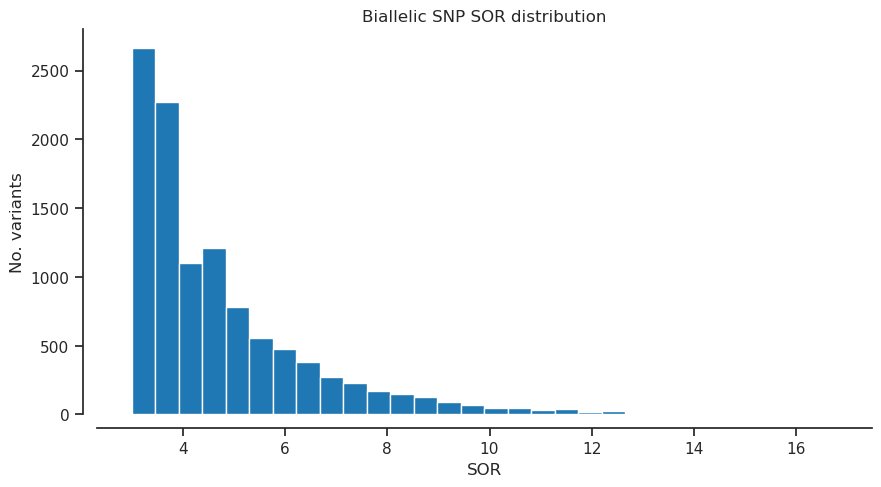

In [29]:
plot_hist('SOR') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

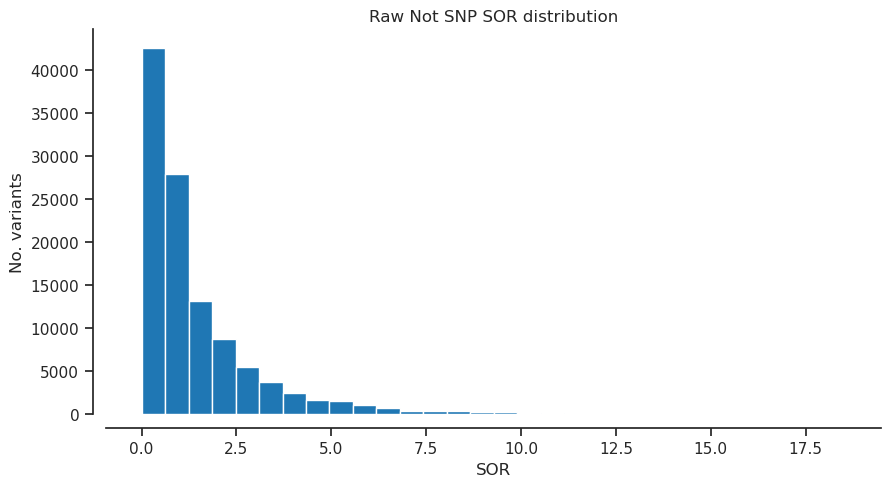

In [30]:
plot_hist('SOR','notsnp') # Symmetric Odds Ratio of 2x2 contingency table to detect strand bias

## MQRankSum - Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

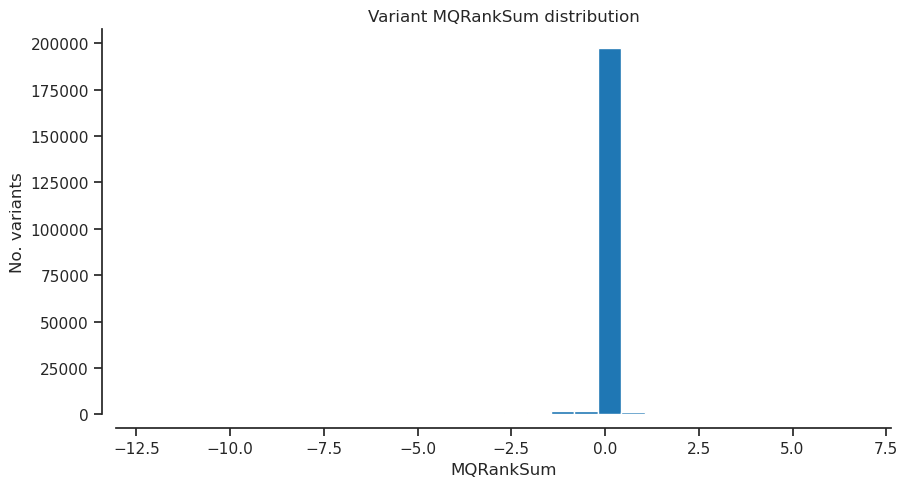

In [31]:
plot_hist('MQRankSum','var') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

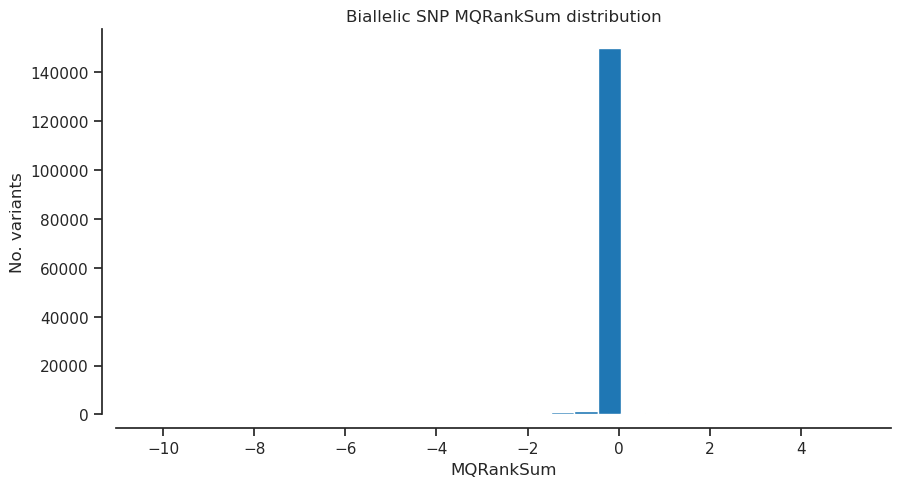

In [32]:
plot_hist('MQRankSum','biallelic') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

In [33]:
filter_expression = '(MQRankSum < -12.5)'
bi_selection = biallelic_np.query(filter_expression)[:]

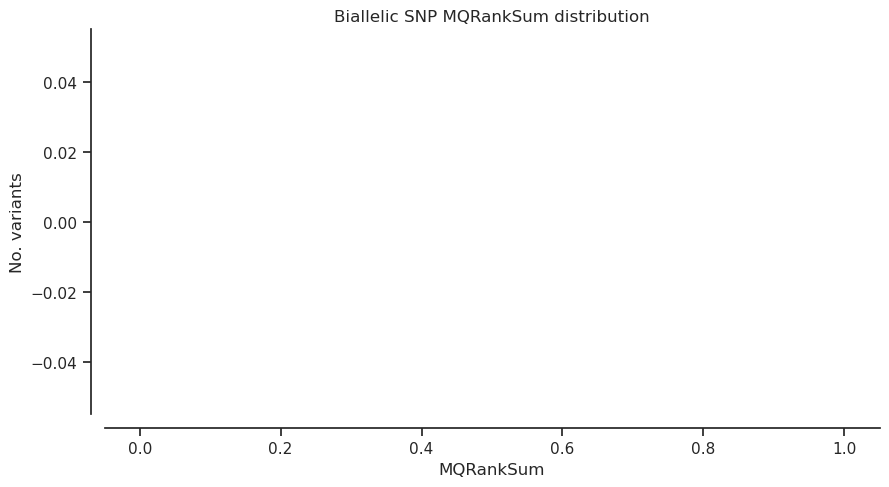

In [34]:
plot_hist('MQRankSum') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

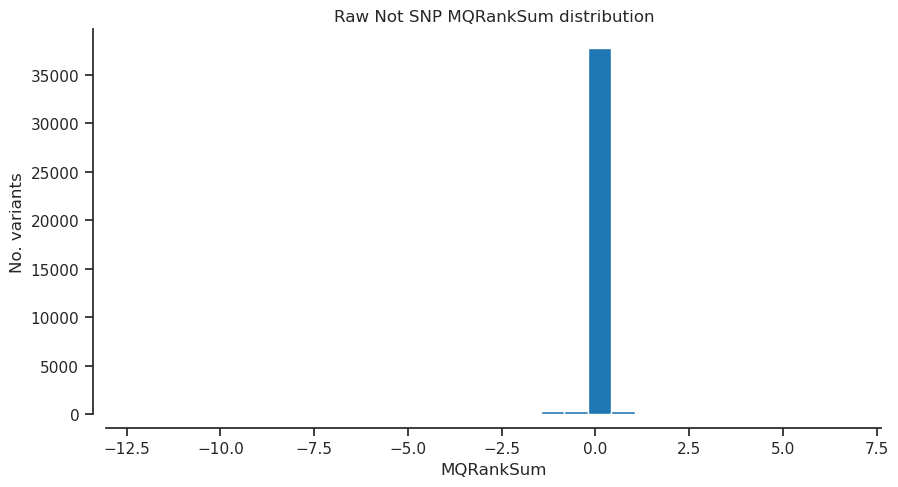

In [35]:
plot_hist('MQRankSum','notsnp') # Z-score From Wilcoxon rank sum test of Alt vs. Ref read mapping qualities

## ReadPosRankSum - Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

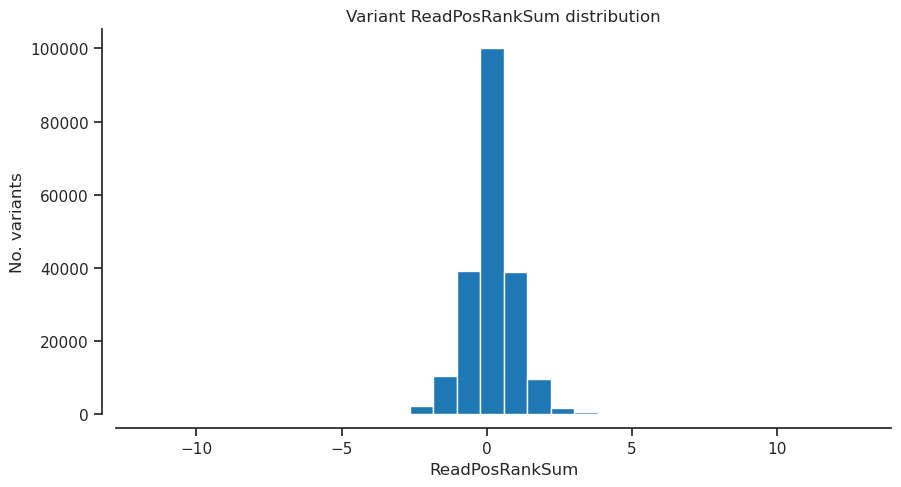

In [36]:
plot_hist('ReadPosRankSum','var') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

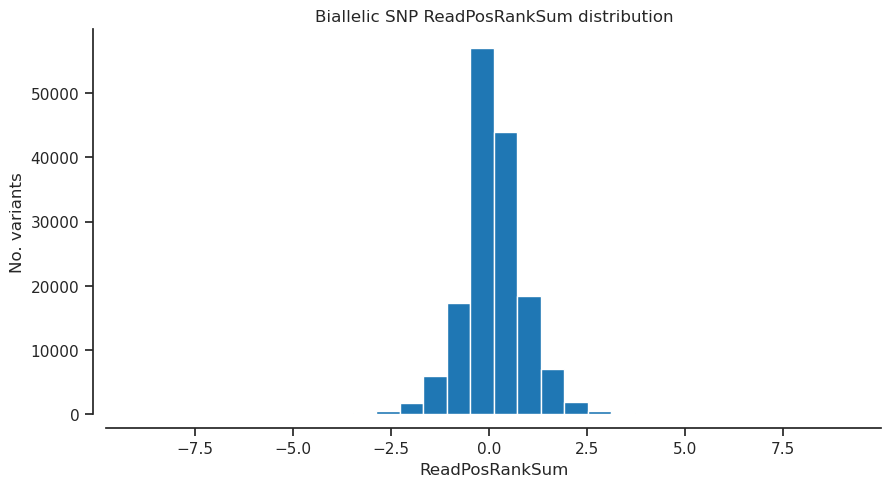

In [37]:
plot_hist('ReadPosRankSum','biallelic') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

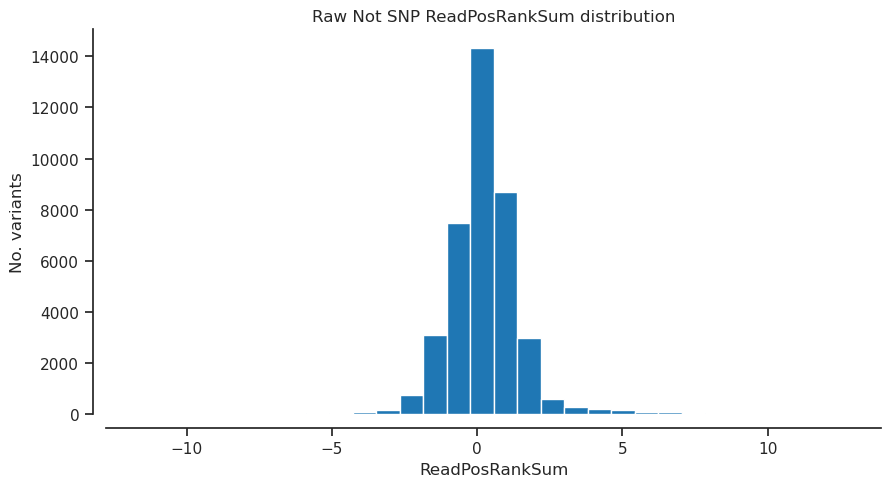

In [38]:
plot_hist('ReadPosRankSum','notsnp') # Z-score from Wilcoxon rank sum test of Alt vs. Ref read position bias

## DP - Approximate read depth

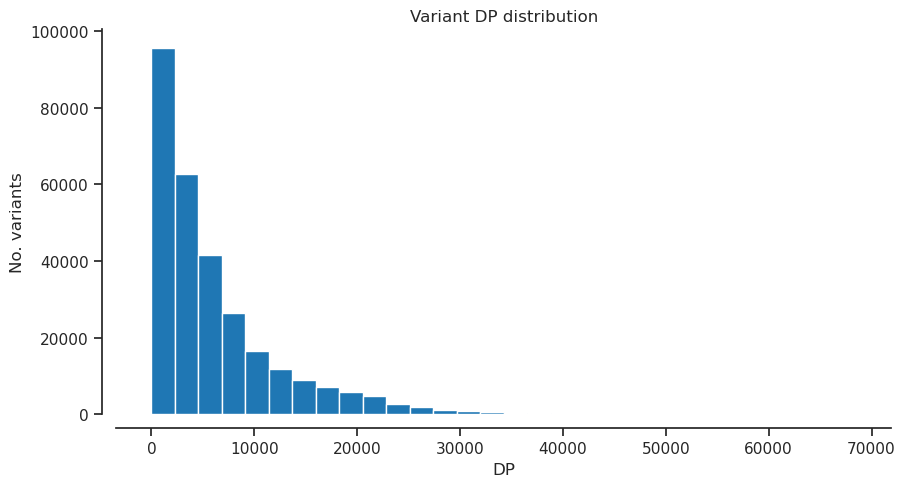

In [39]:
plot_hist('DP','var')

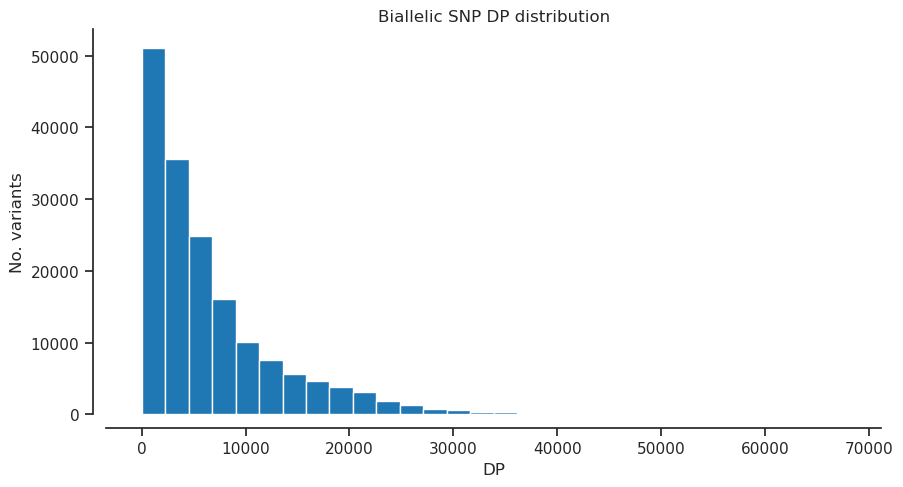

In [40]:
plot_hist('DP','biallelic')

In [41]:
filter_expression = '(DP > 20000) & (DP < 40000)'
bi_selection = biallelic_np.query(filter_expression)[:]

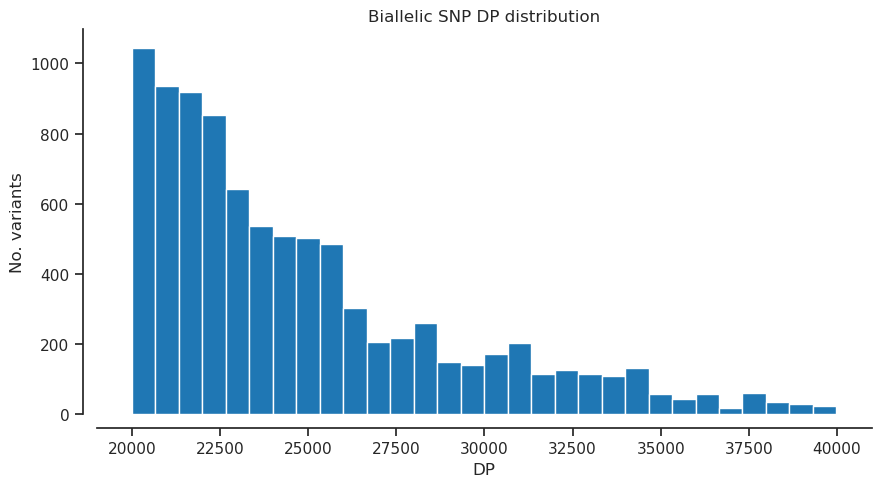

In [42]:
plot_hist('DP')

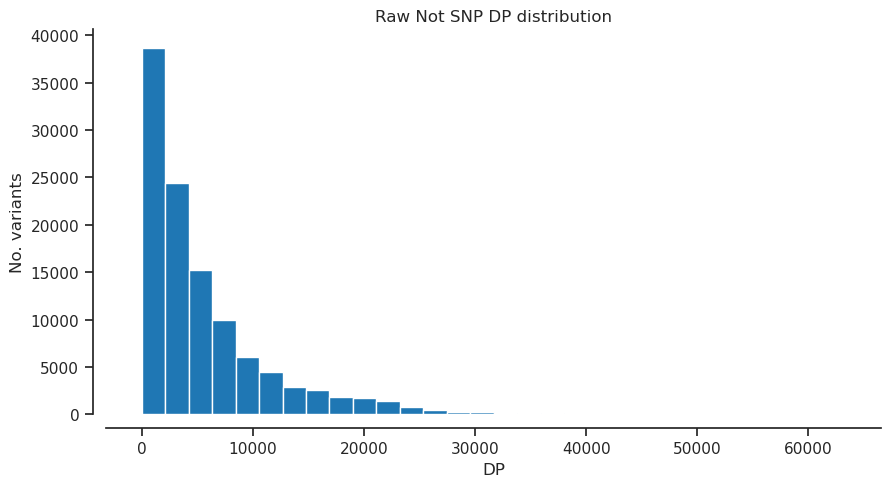

In [43]:
plot_hist('DP','notsnp')

## AN - Total number of alleles in called genotypes

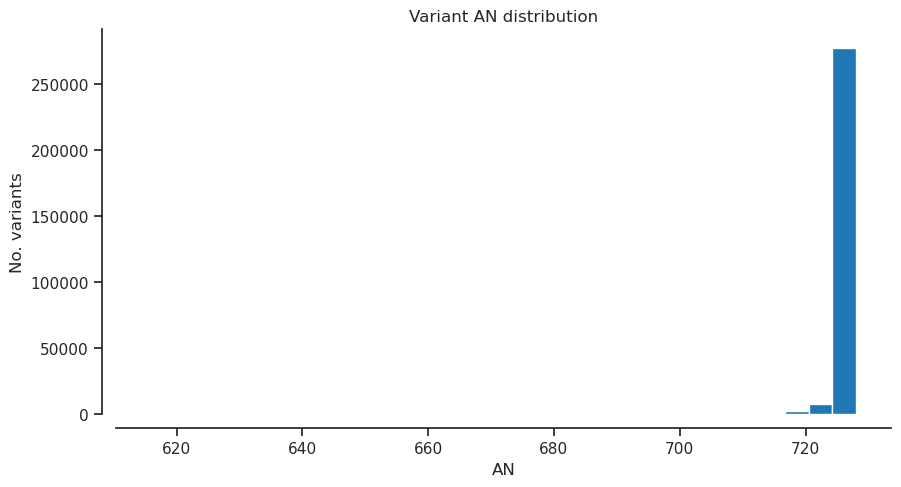

In [44]:
plot_hist('AN','var') # Total number of alleles in called genotypes

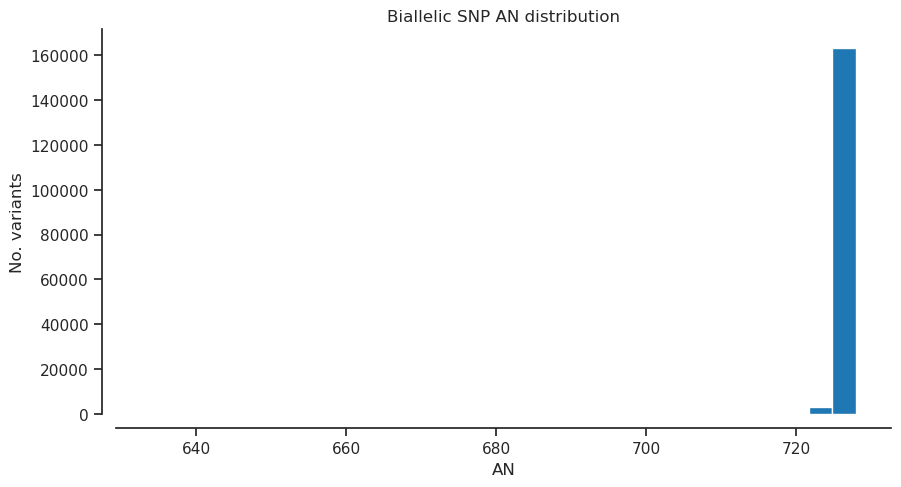

In [45]:
plot_hist('AN','biallelic') # Total number of alleles in called genotypes

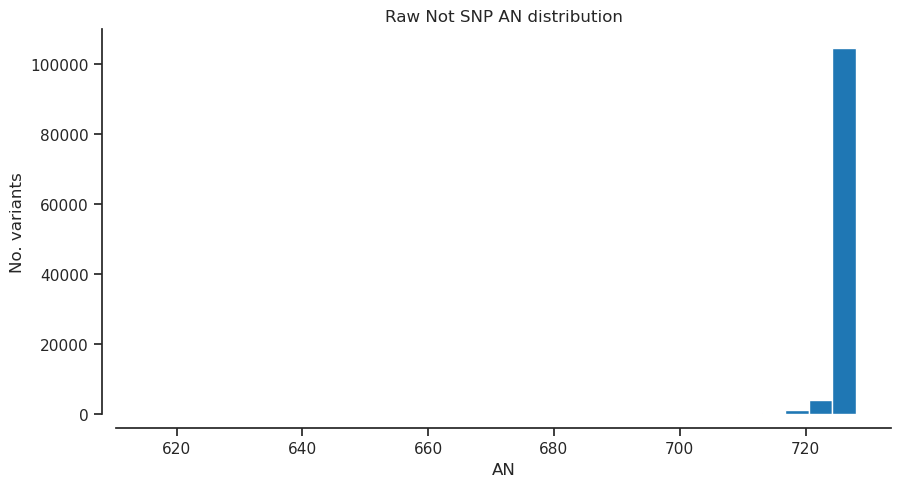

In [46]:
plot_hist('AN','notsnp') # Total number of alleles in called genotypes

## Selected filter

In [7]:
# QD: Variant Confidence/Quality by Depth
# AN: Total number of alleles in called genotypes
filter_expression = '(QD >= 2) & (MQ >= 40) & (MQRankSum >= -12.5) & (is_snp)'
variant_selection = variants_np.eval(filter_expression)[:]
np.count_nonzero(variant_selection)

76150

## Genotype

In [8]:
calldata_var = callset_var['calldata']
list(calldata_var)

['AD', 'DP', 'GQ', 'GT', 'MIN_DP', 'PGT', 'PID', 'PL', 'PS', 'RGQ', 'SB']

In [9]:
genotypes_var = allel.GenotypeChunkedArray(calldata_var['GT'])
genotypes_var

<GenotypeChunkedArray shape=(76467, 351, 2) dtype=int8 chunks=(65536, 64, 2)
   nbytes=51.2M cbytes=6.8M cratio=7.5
   compression=gzip compression_opts=1
   values=h5py._hl.dataset.Dataset>

In [11]:
# using the selected filters set above
gt_filtered_snps = genotypes_var.subset(variant_selection)
gt_filtered_snps

<GenotypeChunkedArray shape=(76150, 351, 2) dtype=int8 chunks=(1190, 351, 2)
   nbytes=51.0M cbytes=13.2M cratio=3.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [12]:
# grab the allele counts for the populations
ac = genotypes_var.count_alleles()
ac

<AlleleCountsChunkedArray shape=(76467, 2) dtype=int32 chunks=(38234, 2)
   nbytes=597.4K cbytes=191.6K cratio=3.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [13]:
ac[:]

<AlleleCountsArray shape=(76467, 2) dtype=int32>
665   1
200 436
636  12
...
245   1
506  16
510   2

In [14]:
# Which ones are biallelic?
is_biallelic_01 = ac.is_biallelic_01()[:]
ac1 = ac.compress(is_biallelic_01, axis=0)[:, :2]
ac1
##this part of the code is only for graphing the SFS, is not useful for filtering biallelic sites

<AlleleCountsArray shape=(76199, 2) dtype=int32>
665   1
200 436
636  12
...
245   1
506  16
510   2

<Axes: xlabel='derived allele frequency', ylabel='site frequency'>

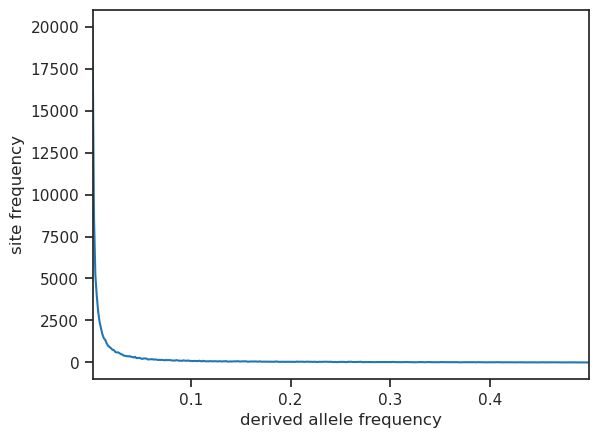

In [15]:
# plot the sfs of the derived allele
s = allel.sfs_folded(ac1)
allel.plot_sfs(s, yscale="linear", n=ac1.sum(axis=1).max())

In [16]:
biallelic = (ac.max_allele() == 1)
###This is the filter expression for biallelic sites
biallelic

<ChunkedArrayWrapper shape=(76467,) dtype=bool chunks=(76467,)
   nbytes=74.7K cbytes=1.9K cratio=39.4
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [17]:
# select only the biallelic variants
gt_biallelic = genotypes_var.compress(biallelic)
gt_biallelic

<GenotypeChunkedArray shape=(76199, 351, 2) dtype=int8 chunks=(1191, 351, 2)
   nbytes=51.0M cbytes=13.2M cratio=3.9
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [18]:
n_variants = len(gt_biallelic)
n_variants

76199

In [19]:
pc_missing = gt_biallelic.count_missing(axis=0)[:] * 100 / n_variants
pc_het = gt_biallelic.count_het(axis=0)[:] * 100 / n_variants

## Samples

In [20]:
samples_var = callset_var['samples']
samples_var = list(samples_var)
samples_var

[b'ESP00102-001',
 b'ESP00102-002',
 b'ESP00102-003',
 b'ESP00102-004',
 b'ESP00102-005',
 b'ESP00102-006',
 b'ESP00102-007',
 b'ESP00102-008',
 b'ESP00102-009',
 b'ESP00102-010',
 b'ESP00102-011',
 b'ESP00102-012',
 b'ESP00102-014',
 b'ESP00102-017',
 b'ESP00102-018',
 b'ESP00102-019',
 b'ESP00102-020',
 b'ESP00102-021',
 b'ESP00102-022',
 b'ESP00102-023',
 b'ESP00102-024',
 b'ESP00102-025',
 b'ESP00199-001',
 b'ESP00199-002',
 b'ESP00199-003',
 b'ESP00199-004',
 b'ESP00199-005',
 b'ESP00199-006',
 b'ESP00199-007',
 b'ESP00199-008',
 b'ESP00199-009',
 b'ESP00199-010',
 b'ESP00199-011',
 b'ESP00199-012',
 b'ESP00199-013',
 b'ESP00199-014',
 b'ESP00199-015',
 b'ESP00199-016',
 b'ESP00199-017',
 b'ESP00199-018',
 b'ESP00199-019',
 b'ESP00199-020',
 b'ESP00199-021',
 b'ESP00199-022',
 b'ESP00199-023',
 b'ESP00199-024',
 b'ESP00199-025',
 b'ESP00337-001',
 b'ESP00337-002',
 b'ESP00337-003',
 b'ESP00337-004',
 b'ESP00337-005',
 b'ESP00337-006',
 b'ESP00337-007',
 b'ESP00337-008',
 b'ESP0033

In [21]:
samples_fn = '~/scratch/data/Bpendula/Betula_pendula_sample_list_scikit-allel_V1.txt'
samples = pandas.read_csv(samples_fn, sep='\t')
samples

,ID,Population
0,ESP00102-001,ESP00102
1,ESP00102-002,ESP00102
2,ESP00102-003,ESP00102
3,ESP00102-004,ESP00102
4,ESP00102-005,ESP00102
...,...,...
346,SWE00093-021,SWE00093
347,SWE00093-022,SWE00093
348,SWE00093-023,SWE00093
349,SWE00093-024,SWE00093


In [22]:
samples.Population.value_counts()

Population
ESP00199    25
ESP00337    25
NLD00013    25
SWE00093    25
LUX00021    25
GBR00015    24
FIN00046    24
ITA00243    24
GBR00013    23
ITA00248    23
ESP00102    22
FIN00044    22
FIN00020    22
FIN00015    22
IRL00017    20
Name: count, dtype: int64

In [23]:
populations = samples.Population.unique()
populations
###This identifiers come from the metadata file

array(['ESP00102', 'ESP00199', 'ESP00337', 'FIN00015', 'FIN00020',
       'FIN00044', 'FIN00046', 'GBR00013', 'GBR00015', 'IRL00017',
       'ITA00243', 'ITA00248', 'LUX00021', 'NLD00013', 'SWE00093'],
      dtype=object)

## Gt frequency function

In [24]:
def plot_genotype_frequency(pc, title):
    fig, ax = plt.subplots(figsize=(24, 5))
    sns.despine(ax=ax, offset=24)
    left = np.arange(len(pc))
    palette = sns.color_palette("hls", 15)
    pop2color = {'ESP00102': palette[0],
                 'ESP00199': palette[8],
                 'ESP00337': palette[1],
                 'FIN00015': palette[9],
                 'FIN00020': palette[2],
                 'FIN00044': palette[10],
                 'FIN00046': palette[3],
                 'GBR00013': palette[11],
                 'GBR00015': palette[4],
                 'IRL00017': palette[12],
                 'ITA00243': palette[5],
                 'ITA00248': palette[13],
                 'LUX00021': palette[6],
                 'NLD00013': palette[14],
                 'SWE00093': palette[7]}
    colors = [pop2color[p] for p in samples.Population]
    ax.bar(left, pc, color=colors)
    ax.set_xlim(0, len(pc))
    ax.set_xlabel('Sample index')
    ax.set_ylabel('Percent calls')
    ax.set_title(title)
    handles = [mpl.patches.Patch(color=palette[0]),
               mpl.patches.Patch(color=palette[8]),
               mpl.patches.Patch(color=palette[1]),
               mpl.patches.Patch(color=palette[9]),
               mpl.patches.Patch(color=palette[2]),
               mpl.patches.Patch(color=palette[10]),
               mpl.patches.Patch(color=palette[3]),
               mpl.patches.Patch(color=palette[11]),
               mpl.patches.Patch(color=palette[4]),
               mpl.patches.Patch(color=palette[12]),
               mpl.patches.Patch(color=palette[5]),
               mpl.patches.Patch(color=palette[13]),
               mpl.patches.Patch(color=palette[6]),
               mpl.patches.Patch(color=palette[14]),
               mpl.patches.Patch(color=palette[7])]
    ax.legend(handles=handles, labels=['ESP00102', 'ESP00199', 'ESP00337', 'FIN00015', 'FIN00020',
       'FIN00044', 'FIN00046', 'GBR00013', 'GBR00015', 'IRL00017',
       'ITA00243', 'ITA00248', 'LUX00021', 'NLD00013', 'SWE00093'], title='Population',
              bbox_to_anchor=(1, 1), loc='upper left')

## Plot missing

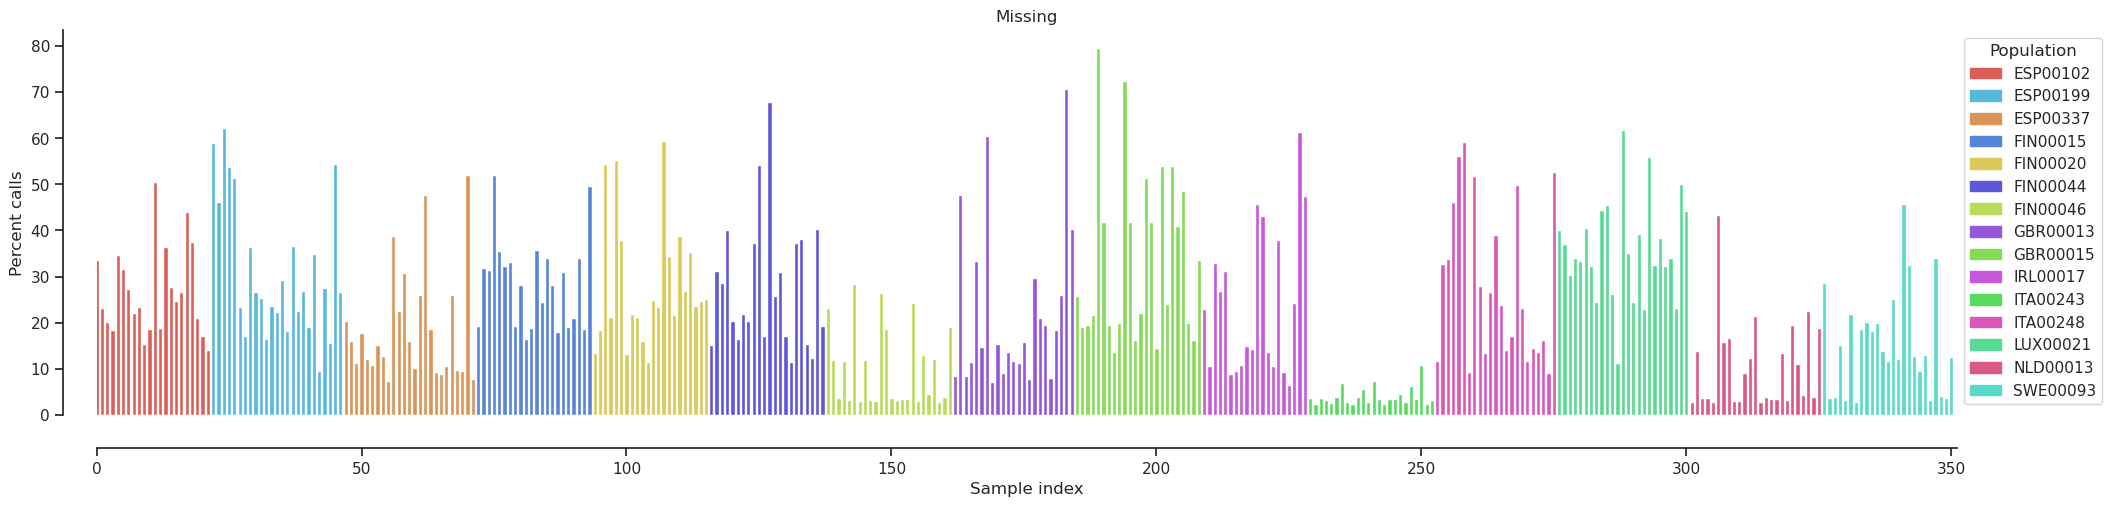

In [25]:
plot_genotype_frequency(pc_missing, 'Missing')

## Plot heterozygosity

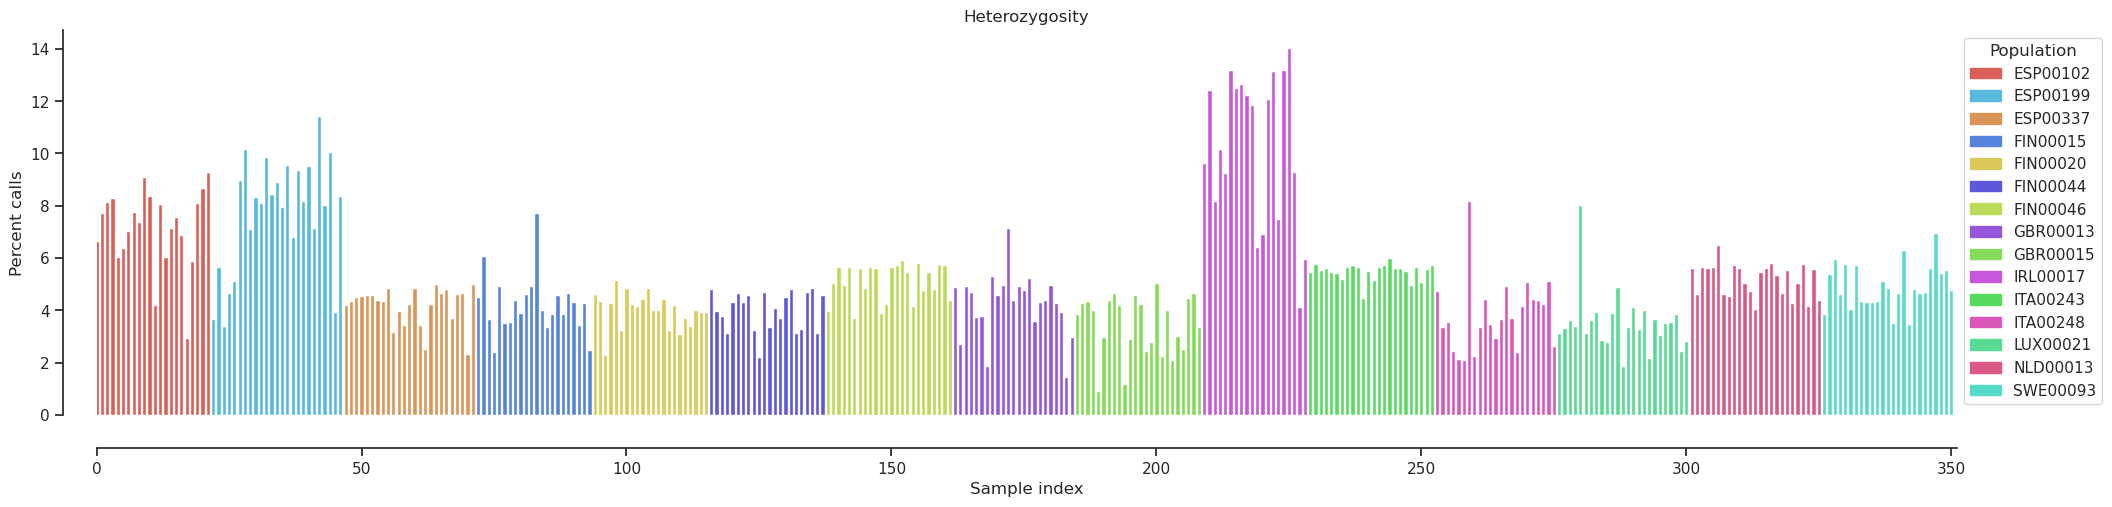

In [26]:
plot_genotype_frequency(pc_het, 'Heterozygosity')

## PCA

In [27]:
palette = sns.color_palette("hls",15)
pop_colours = {    
                'ESP00102': palette[0],
                 'ESP00199': palette[8],
                 'ESP00337': palette[1],
                 'FIN00015': palette[9],
                 'FIN00020': palette[2],
                 'FIN00044': palette[10],
                 'FIN00046': palette[3],
                 'GBR00013': palette[11],
                 'GBR00015': palette[4],
                 'IRL00017': palette[12],
                 'ITA00243': palette[5],
                 'ITA00248': palette[13],
                 'LUX00021': palette[6],
                 'NLD00013': palette[14],
                 'SWE00093': palette[7]
}

In [28]:
def plot_pca_coords(coords, model, pc1, pc2, ax, sample_population):
    sns.despine(ax=ax, offset=5)
    x = coords[:, pc1]
    y = coords[:, pc2]
    for pop in populations:
        flt = (sample_population == pop)
        ax.plot(x[flt], y[flt], marker='o', linestyle=' ', color=pop_colours[pop], 
                label=pop, markersize=6, mec='k', mew=.5)
    ax.set_xlabel('PC%s (%.1f%%)' % (pc1+1, model.explained_variance_ratio_[pc1]*100))
    ax.set_ylabel('PC%s (%.1f%%)' % (pc2+1, model.explained_variance_ratio_[pc2]*100))
    

def fig_pca(coords, model, title, sample_population=None):
    if sample_population is None:
        sample_population = samples.Population
    # plot coords for PCs 1 vs 2, 3 vs 4
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 2, 1)
    plot_pca_coords(coords, model, 0, 1, ax, sample_population)
    ax = fig.add_subplot(1, 2, 2)
    plot_pca_coords(coords, model, 2, 3, ax, sample_population)
    ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
    fig.suptitle(title, y=1.02)
    fig.tight_layout()

In [29]:
ac2 = gt_biallelic.count_alleles()
ac2

<AlleleCountsChunkedArray shape=(76199, 2) dtype=int32 chunks=(38100, 2)
   nbytes=595.3K cbytes=190.9K cratio=3.1
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [30]:
flt = (ac2[:, :2].min(axis=1) > 1)
gf = gt_biallelic.compress(flt, axis=0)
gn = gf.to_n_alt()
gn

<ChunkedArrayWrapper shape=(56189, 351) dtype=int8 chunks=(1756, 351)
   nbytes=18.8M cbytes=2.8M cratio=6.8
   compression=blosc compression_opts={'cname': 'lz4', 'clevel': 5, 'shuffle': 1, 'blocksize': 0}
   values=zarr.core.Array>

In [31]:
coords1, model1 = allel.pca(gn, n_components=10, scaler='patterson')

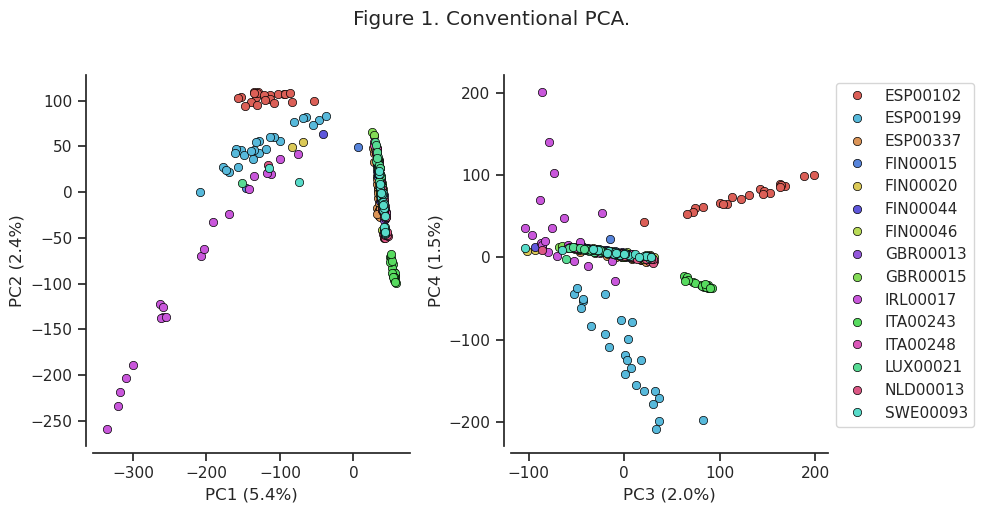

In [32]:
fig_pca(coords1, model1, 'Figure 1. Conventional PCA.')

In [38]:
model1

In [57]:
outliers = ((coords1[:,0]>0) & (coords1[:,1]>0))
samples[outliers]

,ID,Population
17,ESP00102-021,ESP00102
47,ESP00337-001,ESP00337
50,ESP00337-004,ESP00337
56,ESP00337-010,ESP00337
57,ESP00337-011,ESP00337
...,...,...
313,NLD00013-013,NLD00013
326,SWE00093-001,SWE00093
331,SWE00093-006,SWE00093
339,SWE00093-014,SWE00093


In [55]:
outliers = ((coords1[:,0]>0) & (coords1[:,1]>-60) &(coords1[:,1]<0))
samples[outliers]

,ID,Population
48,ESP00337-002,ESP00337
49,ESP00337-003,ESP00337
51,ESP00337-005,ESP00337
52,ESP00337-006,ESP00337
53,ESP00337-007,ESP00337
...,...,...
345,SWE00093-020,SWE00093
346,SWE00093-021,SWE00093
348,SWE00093-023,SWE00093
349,SWE00093-024,SWE00093


In [52]:
outliers = ((coords1[:,0]>0) & (coords1[:,1]>-50) &(coords1[:,1]>50))
samples[outliers]

,ID,Population
168,GBR00013-007,GBR00013
183,GBR00013-024,GBR00013
189,GBR00015-105,GBR00015
194,GBR00015-110,GBR00015
257,ITA00248-005,ITA00248
258,ITA00248-006,ITA00248
275,ITA00248-025,ITA00248
288,LUX00021-013,LUX00021
293,LUX00021-018,LUX00021


In [34]:
coords1[:,0]

array([-148.96736  , -197.95537  , -198.57387  , -201.8657   ,
       -165.3257   , -184.72801  , -187.34471  , -189.30516  ,
       -197.34256  , -215.09433  , -200.77628  , -134.40858  ,
       -200.45107  , -196.02504  , -183.73141  , -193.42851  ,
       -167.54001  , -184.20921  , -192.22644  , -177.55489  ,
         46.86318  , -164.9474   , -195.9502   , -203.5213   ,
       -209.70267  , -123.563416 , -141.0141   , -107.05087  ,
       -125.844154 , -130.56828  , -208.34506  , -213.80334  ,
       -151.85046  , -182.63112  , -189.61328  , -214.39732  ,
       -192.13258  , -202.48477  , -181.60262  , -203.55826  ,
       -172.12856  , -208.17152  , -188.02425  , -203.78363  ,
       -180.83885  , -249.29147  , -183.55765  , -224.52124  ,
       -133.97878  , -187.82428  ,   43.688126 ,   46.331024 ,
         47.796894 ,   44.143612 ,   52.169872 ,   48.611168 ,
         45.684795 ,   47.777916 ,   49.965984 ,   38.025356 ,
         46.953    ,   43.407917 ,   44.516014 ,   48.4

In [42]:
coords1[:,0]<1000

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [46]:
allsamp = samples[coords1[:,0]<1000]
arr = np.concatenate((coords1, allsamp), axis=1)

In [45]:
import csv         
with open('/users/mcevoysu/scratch/output/Bpendula/scikit-allel/bpendula_pca_coords.txt', 'w') as f_output:
    tsv_output = csv.writer(f_output, delimiter='\t')
    for a in arr:
        tsv_output.writerow(a)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (1605863730.py, line 2)

In [73]:
pc_het[outliers]

array([7.41396979, 6.98092625])

In [74]:
pc_missing[outliers]

array([0.10247595, 0.10049255])